<a href="https://colab.research.google.com/github/XinyaoT/pytorch-deep-learning/blob/main/mynotes/01_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch workflow


In [2]:
what_were_covering = {
    "1.data{prepare and load}",
    "2.build model",
    "3.training",
    "make prediction evaluating a model",
    "saving a model",
    "putting all together"
}
what_were_covering

{'1.data{prepare and load}',
 '2.build model',
 '3.training',
 'make prediction evaluating a model',
 'putting all together',
 'saving a model'}

In [3]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.5.1+cu121'

## 1. data {prepare load}
* image
* video
* text
* ...

### 机器学习包含两个部分
* 找到数据的数字表示
* 找到一个模型去拟合这种表示

###以线性回归为例

In [4]:
# create parameter
weight = 0.7
bias = 0.3

# create
start = 0
end = 1
step = 0.02
# 这个操作经常使用，把向量每一个特征展开
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [5]:
len(X),len(y)

(50, 50)

### 数据分成训练集和测试集以及验证集
把数据划分成训练集和测试机

In [6]:
train_split = int(0.8*len(X))
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

visualize

In [10]:
import torch
from torch import nn
import matplotlib.pyplot as plt

def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
  """
  plots training data, test data and compares predictions
  """
  plt.figure(figsize=(10,7))
  # plot training data in blue
  plt.scatter(train_data,train_labels,c="b",s=4,label="training data")
  # plot test data in green
  plt.scatter(test_data,test_labels,c="g",s=4,label="test data")
  if predictions is not None:
    plt.scatter(test_data,predictions,c="r",s = 4,label = "predictions")

  plt.legend(prop={"size":14})

#### what is array_like
https://stackoverflow.com/questions/40378427/numpy-formal-definition-of-array-like-objects

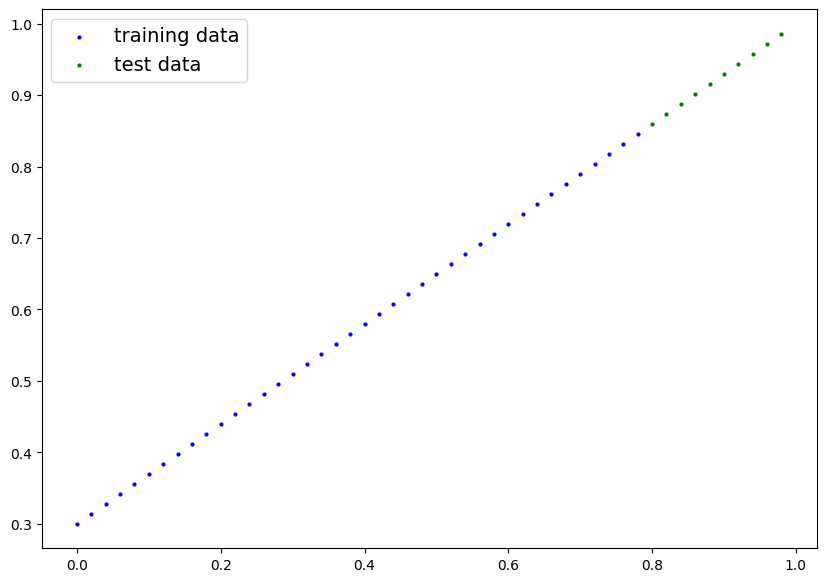

In [8]:
plot_predictions()

## build model
###前向传播
###梯度下降
###反向传播

In [9]:
# 线性回归
from torch import nn
class LinearRegressionModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    # 初始化参数，不一定是下面的显示指定
    self.weights = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
# 类型注解：x 是函数的参数，表示输入数据。这里使用了类型注解 torch.Tensor，表示 x 应该是一个 PyTorch 张量（Tensor）。PyTorch 中的张量是用于存储数据的主要数据结构，类似于 NumPy 中的数组。
# -> torch.Tensor:

# -> torch.Tensor 是返回类型注解，表示 forward 方法将返回一个 PyTorch 张量。注解指出函数的返回类型是一个 torch.Tensor 对象。
  def forward(self,x:torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

### pytorch building essentials

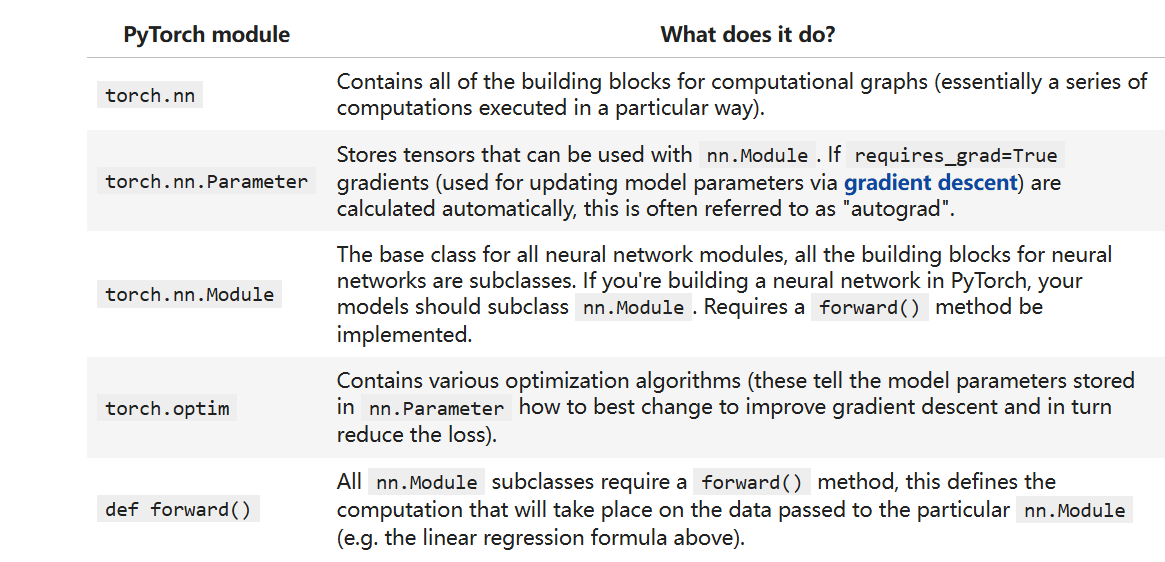

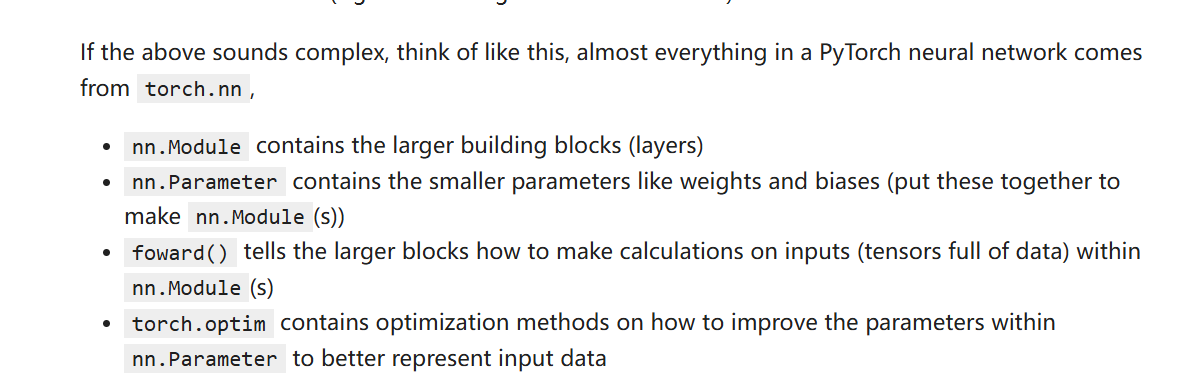

### 检查我们的模型里面有什么内容
* 查看参数的两种方式
* model.parameters()
* model.state_dict()

In [10]:
# 随机种子
import torch
torch.manual_seed(42)
model_0 = LinearRegressionModelV1()
# 查看参数
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [11]:
# list named parameters
# 查看参数
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

###make prediction torch.inference_mode()
用测试集评估模型效果

In [12]:
# 为什么使用 with torch.inference(),而不用直接model(X_test)
# 梯度没有关闭
y_preds= model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [13]:
# 推理模式调用 forward 方法_更推荐
with torch.inference_mode():
   y_preds = model_0(X_test)
y_preds

# 等价于
with torch.no_grad():
   y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [14]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

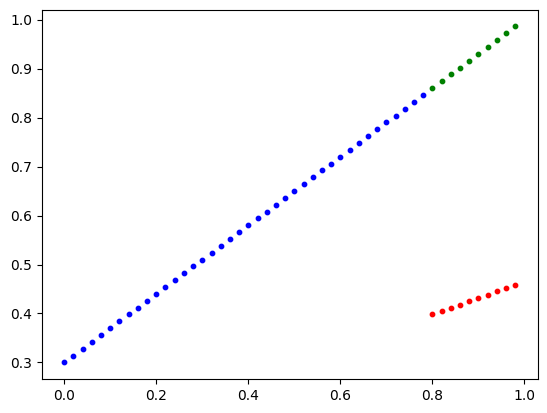

In [15]:
plt.scatter(X_train,y_train,c ="b",s=10)
plt.scatter(X_test,y_test,c="g",s=10)
plt.scatter(X_test,y_preds,c="r",s=10)


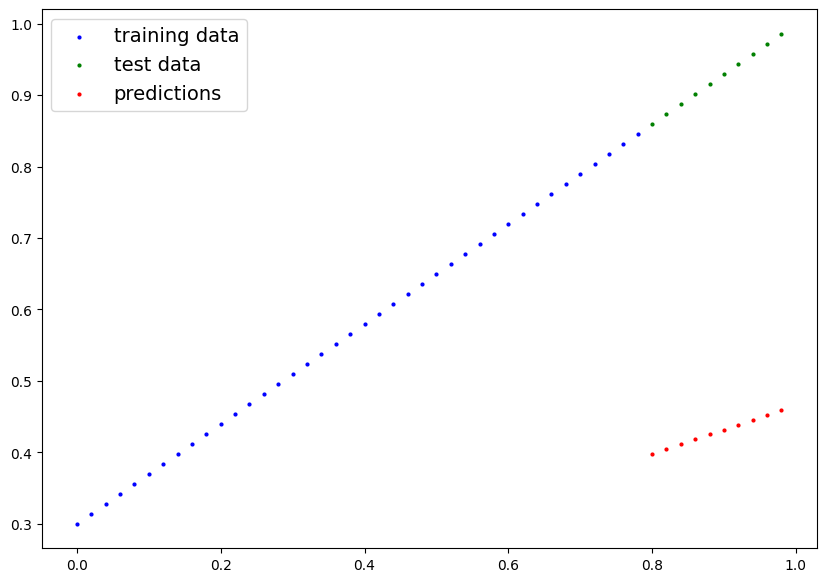

In [16]:
plot_predictions(predictions = y_preds)

## Train model
目标：把一些位置的参数，变得可知
需要：
* loss function:measure how wrong
* optimizer: take into account the loss of a model and adjust the parameters来改善loss function
  * 通常设置两个参数：
    * params：需要优化的参数，比model.parameter啊（）
    * lr
具体来说，我我们需要：
* train loop
* testing loop


In [17]:
# setup a loss function
loss_fn = nn.L1Loss()
# set up a OPTIMIZER
optimizer  = torch.optim.SGD(params = model_0.parameters(),lr=0.01)

### building a train loop
0. loop through data
1. forward prop
2. 计算损失
3. optimizer zero grad
  * 将模型参数的梯度设置为零。为什么需要这样做呢？因为 PyTorch 在计算梯度时会累积之前的梯度值，如果不清零，那么当前的梯度值就会和之前的梯度值混合在一起，这不利于我们准确地计算每一步的梯度值。因此，在每次开始反向传播之前，我们需要调用这个函数来确保从零开始计算梯度。
4. back forward
5. optimizer step（梯度下降）
6. 评估
  * 为什么使用 .eval()？
在训练时，一些层如 Dropout 和 BatchNorm 具有不同的行为：

  * Dropout：在训练过程中，Dropout 随机丢弃（"屏蔽"）一些神经元的输出，以减少过拟合。而在评估模式下，Dropout 会被禁用，即所有神经元都会参与计算。
  * BatchNorm：在训练过程中，BatchNorm 使用当前小批量（batch）的统计量（均值和方差）进行标准化，而在评估模式下，BatchNorm 会使用整个训练过程中累计的统计量来进行标准化。
因此，调用 model_0.eval() 可以确保在进行推理或验证时，模型使用这些层的评估行为。


In [18]:
# epoch
epoch= 100
epoch_count = []
train_loss_value = []
test_loss_value = []
# 0. train
for epoch in range(epoch):
  # set model to train mode
  model_0.train()
  # 1. forward
  y_pred = model_0(X_train)
  # 2. loss
  loss = loss_fn(y_pred,y_train)
  # print(f"loss:{loss}")
  # 3. 梯度清零
  optimizer.zero_grad()
  # 4. backward
  loss.backward()
  # 5. 梯度下降
  optimizer.step()
  # testing
  model_0.eval() #
  # print model.state_dict
  # print(model_0.state_dict())
  with torch.inference_mode():
    test_preds = model_0(X_test)
    test_loss = loss_fn(test_preds,y_test)
    # print(f"test_loss:{test_loss}")
  if epoch %10 ==0:
    train_loss_value.append(loss)
    test_loss_value.append(test_loss)
    epoch_count.append(epoch)
    print(f"epoch:{epoch},loss:{loss},test_loss:{test_loss}")
    print(model_0.state_dict())
# plot_predictions(predictions = y_preds)

epoch:0,loss:0.31288138031959534,test_loss:0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
epoch:10,loss:0.1976713240146637,test_loss:0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
epoch:20,loss:0.08908725529909134,test_loss:0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
epoch:30,loss:0.053148526698350906,test_loss:0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
epoch:40,loss:0.04543796554207802,test_loss:0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
epoch:50,loss:0.04167863354086876,test_loss:0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
epoch:60,loss:0.03818932920694351,test_loss:0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788]))])
epoch:70,loss:0.03476089984178543,test_loss

In [19]:
train_loss_value,test_loss_value
train_loss_value = torch.tensor(train_loss_value).numpy()
test_loss_value = torch.tensor(test_loss_value).numpy()
print(train_loss_value)
print(test_loss_value)

[0.31288138 0.19767132 0.08908726 0.05314853 0.04543797 0.04167863
 0.03818933 0.0347609  0.03132383 0.0278874 ]
[0.48106518 0.3463552  0.2172966  0.14464018 0.11360953 0.09919948
 0.08886633 0.08059376 0.07232123 0.06473556]


*遗忘内容*：
* torch.tensor(data, dtype=None, device=None, requires_grad=False)：构造tensor，data可以是列表、元组、数组、scalar等类型，这里的loss是每个元素是tensor的列表，需要把他转化成numpy数组，先转成tensor，再用numpy（）

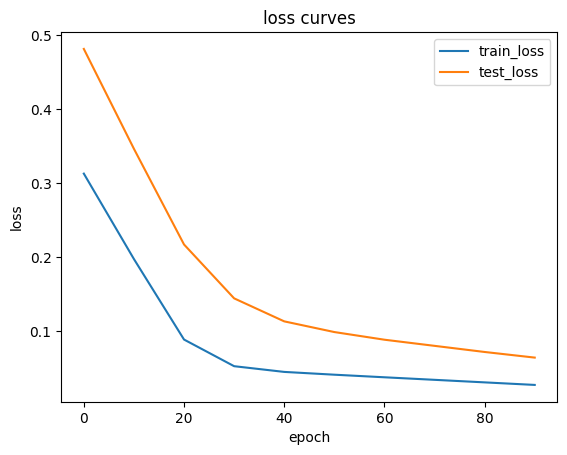

In [20]:
# plot losscurves
import numpy as np

plt.plot(epoch_count,train_loss_value,label="train_loss")
plt.plot(epoch_count,test_loss_value,label="test_loss")
plt.title("loss curves")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend()

In [21]:
with torch.inference_mode():
   y_preds = model_0(X_test)
y_preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

In [22]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

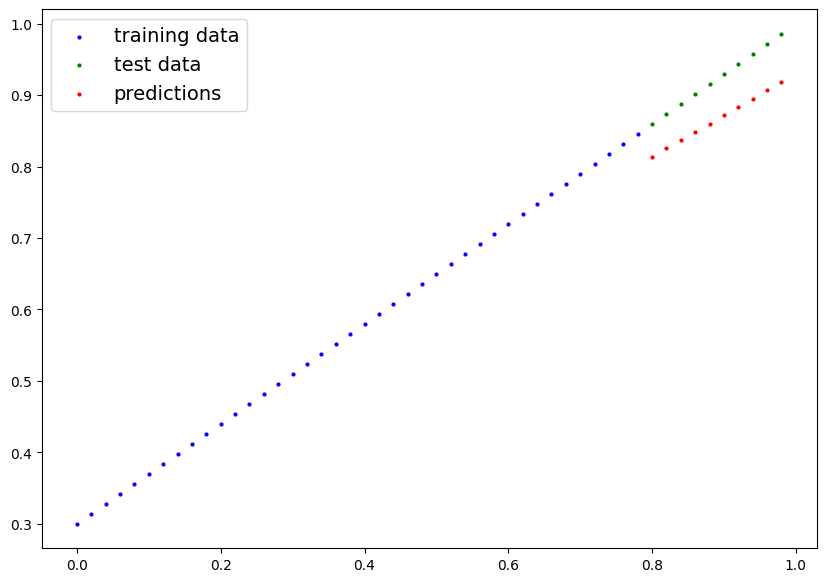

In [23]:
plot_predictions(predictions = y_preds)

###完整的数据准备、模型定义、训练、测试代码

epoch:0,loss:0.31288138031959534,test_loss:0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
epoch:10,loss:0.1976713240146637,test_loss:0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
epoch:20,loss:0.08908725529909134,test_loss:0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
epoch:30,loss:0.053148526698350906,test_loss:0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
epoch:40,loss:0.04543796554207802,test_loss:0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
epoch:50,loss:0.04167863354086876,test_loss:0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
epoch:60,loss:0.03818932920694351,test_loss:0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788]))])
epoch:70,loss:0.03476089984178543,test_loss

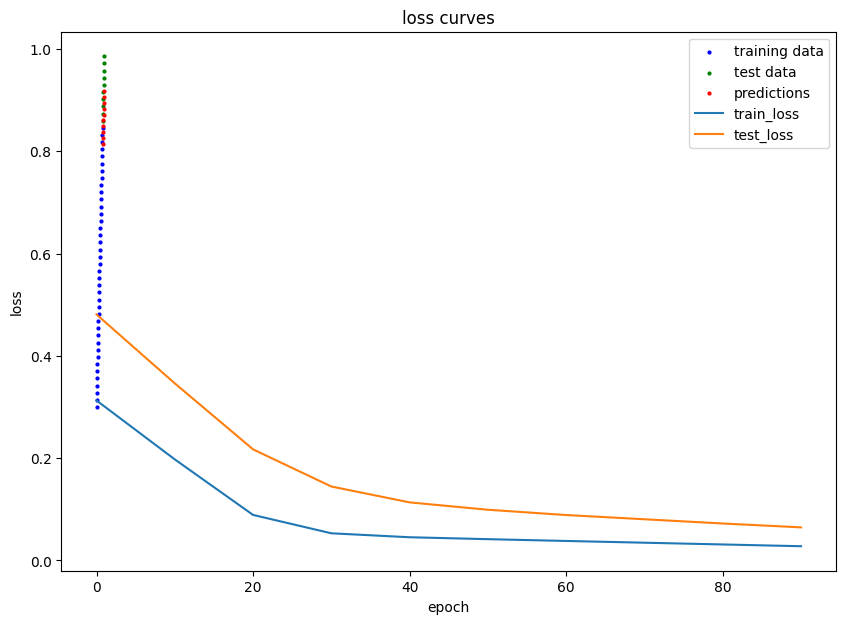

In [24]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
# 可视化
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
  """
  plots training data, test data and compares predictions
  """
  plt.figure(figsize=(10,7))
  # plot training data in blue
  plt.scatter(train_data,train_labels,c="b",s=4,label="training data")
  # plot test data in green
  plt.scatter(test_data,test_labels,c="g",s=4,label="test data")
  if predictions is not None:
    plt.scatter(test_data,predictions,c="r",s = 4,label = "predictions")

  plt.legend(prop={"size":14})

# 模拟数据准备：
# create parameter
weight = 0.7
bias = 0.3

# create
start = 0
end = 1
step = 0.02
# 这个操作经常使用，把向量每一个特征展开
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias
X[:10],y[:10]

# 数据准备：
train_split = int(0.8*len(X))
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]
# len(X_train),len(y_train),len(X_test),len(y_test)

# 线性回归模型定义
class LinearRegressionModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    # 初始化参数，不一定是下面的显示指定
    self.weights = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
# 类型注解：x 是函数的参数，表示输入数据。这里使用了类型注解 torch.Tensor，表示 x 应该是一个 PyTorch 张量（Tensor）。PyTorch 中的张量是用于存储数据的主要数据结构，类似于 NumPy 中的数组。
# -> torch.Tensor:

# -> torch.Tensor 是返回类型注解，表示 forward 方法将返回一个 PyTorch 张量。注解指出函数的返回类型是一个 torch.Tensor 对象。
  def forward(self,x:torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

# 模型训练
torch.manual_seed(42)
model_0 = LinearRegressionModelV1()
loss_fn = nn.L1Loss()
optimizer  = torch.optim.SGD(params = model_0.parameters(),lr=0.01)
epoch= 100
epoch_count = []
train_loss_value = []
test_loss_value = []
# 0. train
for epoch in range(epoch):
  # set model to train mode
  model_0.train()
  y_pred = model_0(X_train)
  loss = loss_fn(y_pred,y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  # 每一个epoch进行测试
  model_0.eval()
  with torch.inference_mode():
    test_preds = model_0(X_test)
    test_loss = loss_fn(test_preds,y_test)
  if epoch %10 ==0:
    train_loss_value.append(loss)
    test_loss_value.append(test_loss)
    epoch_count.append(epoch)
    print(f"epoch:{epoch},loss:{loss},test_loss:{test_loss}")
    print(model_0.state_dict())

# 可视化、
with torch.inference_mode():
  y_preds = model_0(X_test)
  plot_predictions(predictions = y_preds)

train_loss_value = torch.tensor(train_loss_value).numpy()
test_loss_value = torch.tensor(test_loss_value).numpy()
plt.plot(epoch_count,train_loss_value,label="train_loss")
plt.plot(epoch_count,test_loss_value,label="test_loss")
plt.title("loss curves")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend()

##保存模型
1. `torch.save()`:使用python的pickle用于序列化
2. `torch.load()`:能够加载上述保存的模型
3. `torch.nn.Module.load_state_dict()`:加载模型保存的状态字典
  * what is a state_dict
  https://pytorch.org/tutorials/beginner/saving_loading_models.html?highlight=load_state_dict

  * 还有一种方式是保存整个模型

In [25]:
# saving our pytorch model
from pathlib import Path
# 1. crate models 目录
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

# 2. create model save path
MODEL_NAME = "01_pytorch_workflow_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. save the model state dict
print(f"saving model to:{MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)

saving model to:models/01_pytorch_workflow_model.pth


In [27]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

###加载模型

In [28]:
# 加载模型
loaded_model_0 = LinearRegressionModelV1()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_0.state_dict()

<ipython-input-28-cb8aa7fc372b>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [30]:
# 预测的常规做法
loaded_model_0.eval()
with torch.inference_mode():
  y_preds = loaded_model_0(X_test)
model_0.eval()
with torch.inference_mode():
  y_pred = model_0(X_test)
y_pred == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

##合起来 putting them together


In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
# torch version
torch.__version__


'2.5.1+cu121'

device

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"using device:{device}")

using device:cuda


data
*遗忘内容：*
* torch.arange（start,end,step）

In [20]:
# create some data
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [21]:
# split data
train_split = int(0.8*len(X))
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

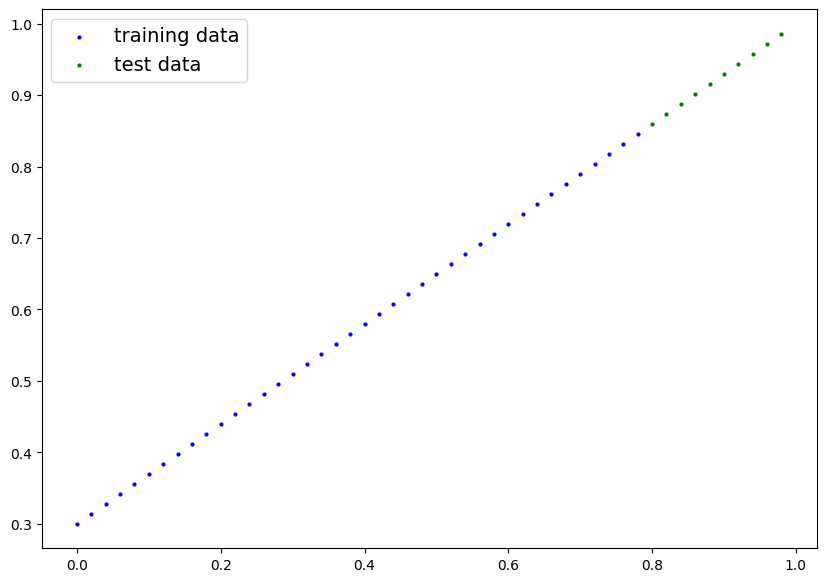

In [22]:
plot_predictions(X_train,y_train,X_test,y_test)

build a model

In [12]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    # 并不需要自己指定参数，一般使用层来隐式指定，这里对我来说明白的是，指定层的含义其实就是隐式指定了参数（论文里面的修改点也会有这种，可学习的参数层）
    self.linear_layer = nn.Linear(in_features = 1,out_features = 1)

  def forward(self,x:torch.Tensor)->torch.Tensor:
    return self.linear_layer(x)
torch.manual_seed(42)
model_1 = LinearRegressionModel()
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

next(model_1.parameters()).device 这个表达式用于获取 model_1（通常是一个 PyTorch 神经网络模型）中第一个参数（如权重或偏置）的设备信息，即该参数所在的硬件设备（如 CPU 或 GPU）。

In [26]:
# 检查当前的模型运行环境
next(model_1.parameters()).device
# tensor.device


device(type='cuda', index=0)

In [27]:
# 设置device
model_1.to(device)
next(model_1.parameters()).device


device(type='cuda', index=0)

In [28]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6861]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.6290], device='cuda:0'))])

####1. state_dict() 的基本概念
state_dict() 返回一个 OrderedDict（有序字典），字典中的每一项表示模型的一个参数（或缓冲区）。对于一个神经网络模型来说，常见的参数包括：

模型的权重（weights）
模型的偏置（biases）
优化器状态（optimizer state）
设备信息（device）
####2. 模型中的内容
当你调用 state_dict() 时，它通常会包含以下几类内容：

(1) 模型的参数（parameters）
这些是模型的可训练参数，通常是网络层的权重和偏置。例如：

conv1.weight：第一个卷积层的权重。
fc1.bias：第一个全连接层的偏置。
(2) 模型的缓冲区（buffers）
缓冲区通常是一些不需要更新的状态变量，虽然它们在训练过程中参与计算，但它们不是通过梯度更新的。例如：

running_mean 和 running_var：BatchNorm 层中的均值和方差。
num_batches_tracked：BatchNorm 层中的批次数，用于更新统计信息。

train



In [34]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_1.parameters(),lr = 0.01)

In [33]:
torch.manual_seed(42)
epochs = 200
# put all tensor into one device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)
epoch_count = []
train_loss_value = []
test_loss_value = []
for epoch in range(epochs):
  model_1.train()
  y_pred = model_1(X_train)
  loss = loss_fn(y_pred,y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  # testing
  model_1.eval()
  with torch.inference_mode():
    test_preds = model_1(X_test)
    test_loss  = loss_fn(y_test,test_preds)
  if epoch %10 ==0:
    train_loss_value.append(loss)
    test_loss_value.append(test_loss)
    epoch_count.append(epoch)
    print(f"epoch:{epoch},loss:{loss},test_loss:{test_loss}")
    # print(model_1.state_dict())

epoch:0,loss:0.01641424186527729,test_loss:0.03831476718187332
epoch:10,loss:0.016070591285824776,test_loss:0.03748738765716553
epoch:20,loss:0.015726853162050247,test_loss:0.03672868758440018
epoch:30,loss:0.015383987687528133,test_loss:0.03590130805969238
epoch:40,loss:0.015040159225463867,test_loss:0.03507394716143608
epoch:50,loss:0.014696592465043068,test_loss:0.034315235912799835
epoch:60,loss:0.014353624545037746,test_loss:0.03348787501454353
epoch:70,loss:0.01400972343981266,test_loss:0.032660502940416336
epoch:80,loss:0.013666331768035889,test_loss:0.03190178796648979
epoch:90,loss:0.01332318689674139,test_loss:0.03107442893087864
epoch:100,loss:0.012979285791516304,test_loss:0.030247068032622337
epoch:110,loss:0.012636077590286732,test_loss:0.0294883381575346
epoch:120,loss:0.012292754836380482,test_loss:0.028660988435149193
epoch:130,loss:0.011948849074542522,test_loss:0.027833610773086548
epoch:140,loss:0.011605820618569851,test_loss:0.0270749032497406
epoch:150,loss:0.0112



> tips:如果不使用`.unsqueeze(dim = 1)`,就会出现mat1和mat2形状不匹配的错误，1*40和1*1

**为什么需要 unsqueeze？**

1. 维度匹配： 在许多情况下，神经网络的输入数据必须具有特定的维度。比如，某些操作或层（如全连接层 Linear、卷积层 Conv2d）通常期望输入是二维或三维张量。

例如，torch.nn.Linear(in_features, out_features) 期望的输入形状是 (batch_size, in_features)，即一个二维张量。如果你直接使用 torch.arange，你得到的是一个形状为 (5,) 的一维张量（长度为 5）。为了将这个张量输入到神经网络层，需要将它变为 (5, 1) 的二维张量，其中 5 是 batch size，1 是特征数。

2. 符合操作要求： 在某些操作中，比如矩阵乘法、广播操作等，输入的维度需要对齐。unsqueeze(dim=1) 就是确保维度对齐的常用方法之一。比如，假设你需要进行点积运算或者与其他二维张量进行元素级操作，你就需要确保输入张量的维度正确。

示例：广播机制
假设你有一个 (5,) 的张量和一个 (5, 3) 的张量，并想让它们进行广播运算。为了让这两个张量广播匹配，可以使用 unsqueeze 来改变它们的形状。

python
复制代码
`a = torch.arange(5)  # 形状 (5,)`
b = torch.randn(5, 3)  # 形状 (5, 3)`

`a = a.unsqueeze(1)  # 变为形状 (5, 1)`
`result = a + b  # 自动广播，a 扩展成形状 (5, 3)，然后与 b 相加`
这样，a 就变成了一个 (5, 1) 的列向量，能够与 (5, 3) 的张量 b 进行广播操作。

3. 总结
unsqueeze(dim=1) 是为了在指定的维度上插入一个新的维度，常常用于调整张量的形状，以便与其他张量或网络层的输入格式匹配。通过增加一个维度，它可以使一维张量变为二维张量，从而满足某些操作或层的输入要求。


In [35]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6525]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3200], device='cuda:0'))])

visualize evaluate

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

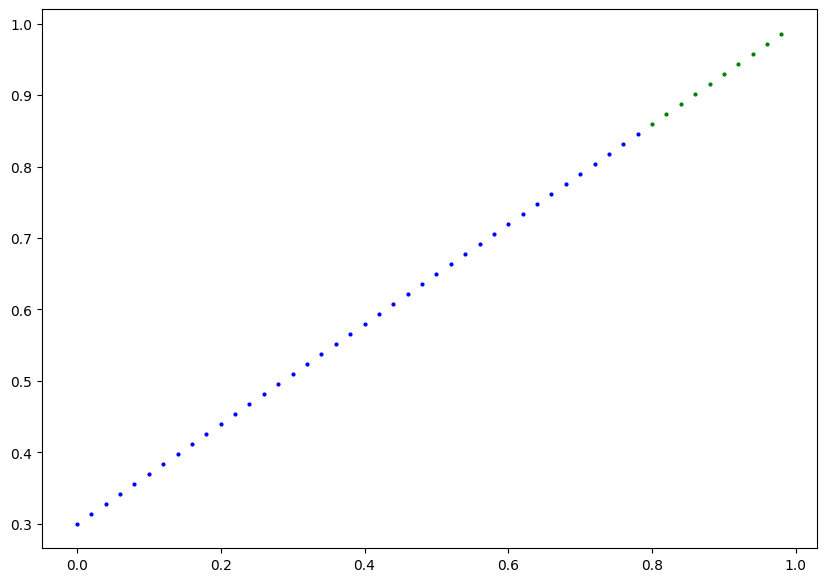

In [36]:
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds
plot_predictions(predictions = y_preds)



> numpy 只能在cpu上，所以在GPU上计算后的tensor需要
`.cpu()`



In [39]:
y_preds

tensor([[0.8420],
        [0.8550],
        [0.8681],
        [0.8811],
        [0.8942],
        [0.9072],
        [0.9203],
        [0.9333],
        [0.9464],
        [0.9594]], device='cuda:0')

In [44]:
# y_preds.cpu().numpy()
torch.tensor(y_preds.cpu()).numpy()

<ipython-input-44-b01b06dec998>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(y_preds.cpu()).numpy()


array([[0.8419834 ],
       [0.8550338 ],
       [0.8680843 ],
       [0.88113475],
       [0.8941852 ],
       [0.9072357 ],
       [0.9202861 ],
       [0.9333366 ],
       [0.94638705],
       [0.95943755]], dtype=float32)

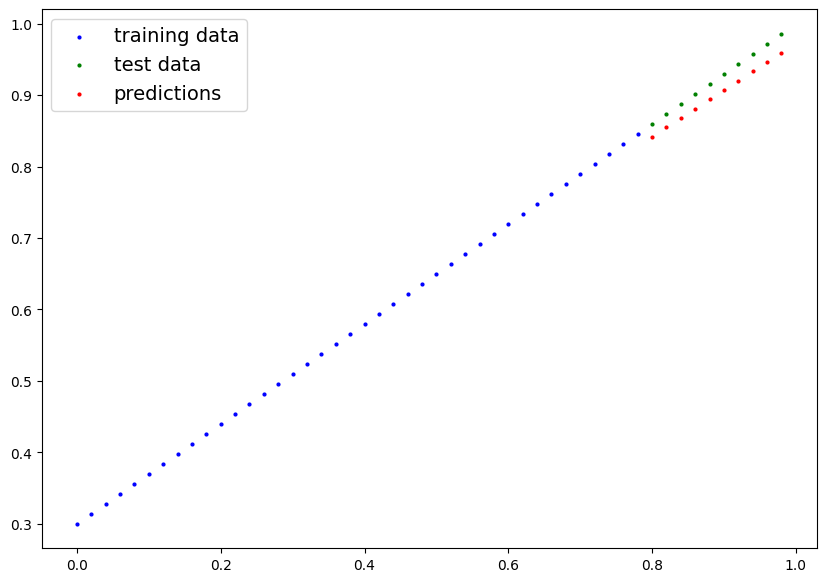

In [46]:
# plt要求 数据必须在cpu上，。不一定是numpy
plot_predictions(predictions = y_preds.cpu())

save model


In [48]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
print(f"saving model to:{MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),f=MODEL_SAVE_PATH)

saving model to:models/01_pytorch_workflow_model_1.pth


In [49]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6525]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3200], device='cuda:0'))])

load model

In [51]:
# 实例化模型
load_model_1 = LinearRegressionModel()
# 加载模型，加载状态字典
load_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH,weights_only=False))
load_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6525]])),
             ('linear_layer.bias', tensor([0.3200]))])

In [54]:
X_test.device

device(type='cuda', index=0)

In [55]:
next(load_model_1.parameters()).device

device(type='cpu')

In [56]:
load_model_1.to(device)
next(load_model_1.parameters()).device

device(type='cuda', index=0)

In [57]:
# 使用加载好的模型
load_model_1.eval()
with torch.inference_mode():
  y_pred = load_model_1(X_test)
y_pred == y_preds


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')